In [51]:
data1 <- read.csv("C:\\Users\\LENOVO\\Desktop\\sampledata.csv", header = TRUE,
                  stringsAsFactors = FALSE,
                  strip.white = TRUE ,
                  sep = ',')
data1$Class <- as.factor(data1$Class)

In [66]:
library(dplyr)
x<-select(data1,c(2:31))
y<-data1$Class
library(e1071)
svm_model<-svm(Class~V14+V17,data= data1)

In [68]:
pred <- predict(svm_model,x)
table(pred,y)
nrow(x)

    y
pred    0    1
   0 1469   75
   1    7  417

[1] 1968

In [75]:
svm_model = svm(Class~V17+V14, data = training_set,
                  type = 'C-classification', kernel = 'radial')
svm_model


Call:
svm(formula = Class ~ V17 + V14, data = training_set, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  171


In [76]:
# Tununig

svm_tune <- tune(svm, train.x=x, train.y=y, 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

print(svm_tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.147392 



In [77]:
# After you find the best cost and gamma, you can create svm model again and try to run again
svm_model_after_tune <- svm(Class ~ ., data=data1, kernel="radial", cost=1, gamma=0.5)
summary(svm_model_after_tune)


Call:
svm(formula = Class ~ ., data = data1, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  1561

 ( 1100 461 )


Number of Classes:  2 

Levels: 
 0 1




In [69]:
library(caTools)

split = sample.split(data1$Class, SplitRatio = .8)
training_set = subset(data1, split == TRUE)
test_set = subset(data1, split == FALSE)
nrow(training_data)
nrow(test_data)

#sclaing the fields
training_set[-32] = scale(training_set[-32])
test_set[-32] = scale(test_set[-32])

[1] 1600

[1] 725

In [78]:
classifier1 <- svm(formula = Class~., data = training_set, type = 'C-classification', kernel = 'radial')

In [80]:
classifier1


Call:
svm(formula = Class ~ ., data = training_set, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03225806 

Number of Support Vectors:  233


In [88]:
classifier2 <- svm(formula = Class~ V14+V17, data= training_set , type = 'C-classification', kernal = 'radial')

In [83]:
classifier2


Call:
svm(formula = Class ~ V14 + V17, data = training_set, type = "C-classification", 
    kernal = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  171


In [92]:
test_pred = predict(classifier2, test_set[,-32])
conf_mat <- table(test_pred,test_set$Class)
conf_mat

         
test_pred   0   1
        0 292  13
        1   3  85

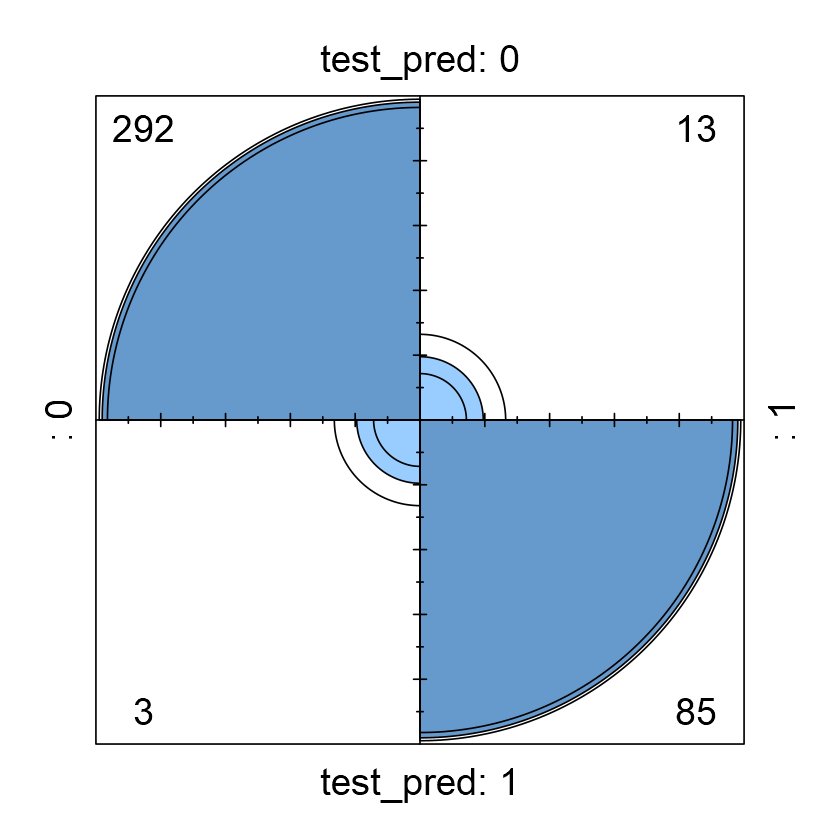

In [96]:
library(caret)
fourfoldplot(table(test_pred,test_set$Class))

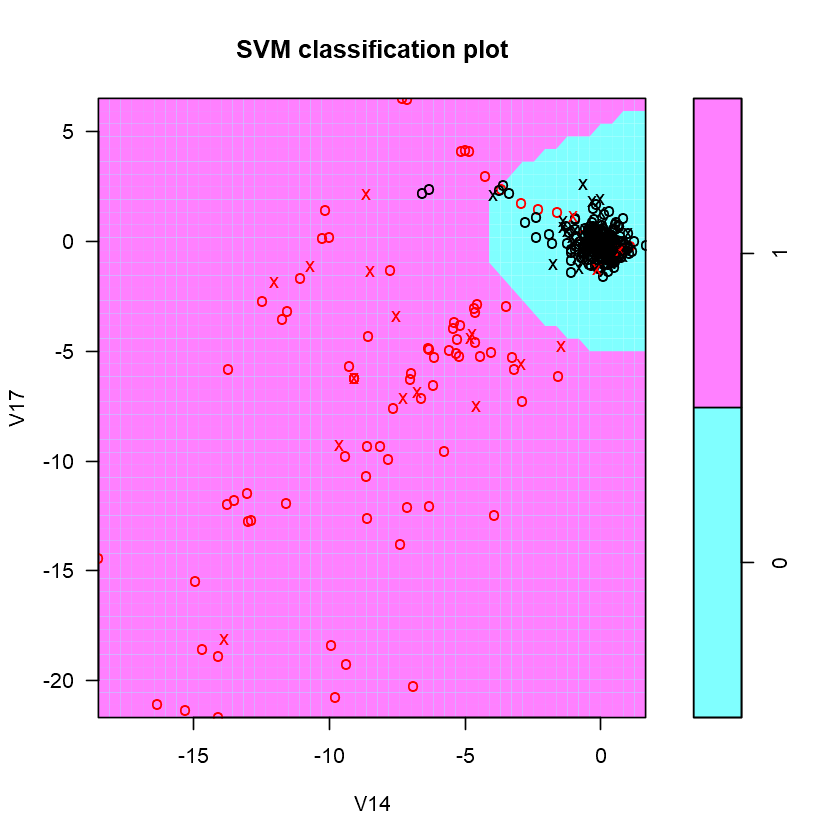

In [97]:
plot(svm_mod,test_data,V17~V14)